In [1]:
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nickel_path = "./nickels"
nickel_files = glob(f"{nickel_path}/*")

quarters_path = "./quarters"
quarters_files = glob(f"{quarters_path}/*")

cents_path = "./cents"
cents_files = glob(f"{cents_path}/*")

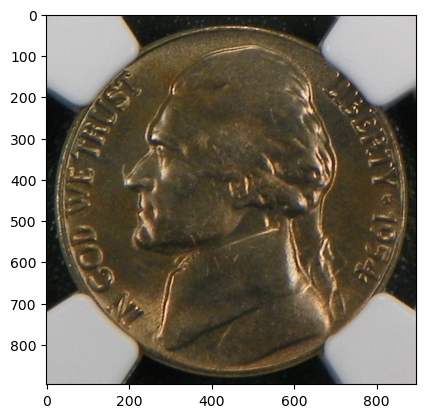

In [3]:
img = Image.open(nickel_files[100])
img = np.asarray(img)
plt.imshow(img)

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray_img, (15, 15), 0)

In [5]:
sobel_x = cv2.Sobel(src = img_blur, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(src = img_blur, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
sobel_xy = cv2.Sobel(src = img_blur, ddepth = cv2.CV_64F, dx = 1, dy = 1, ksize = 5)

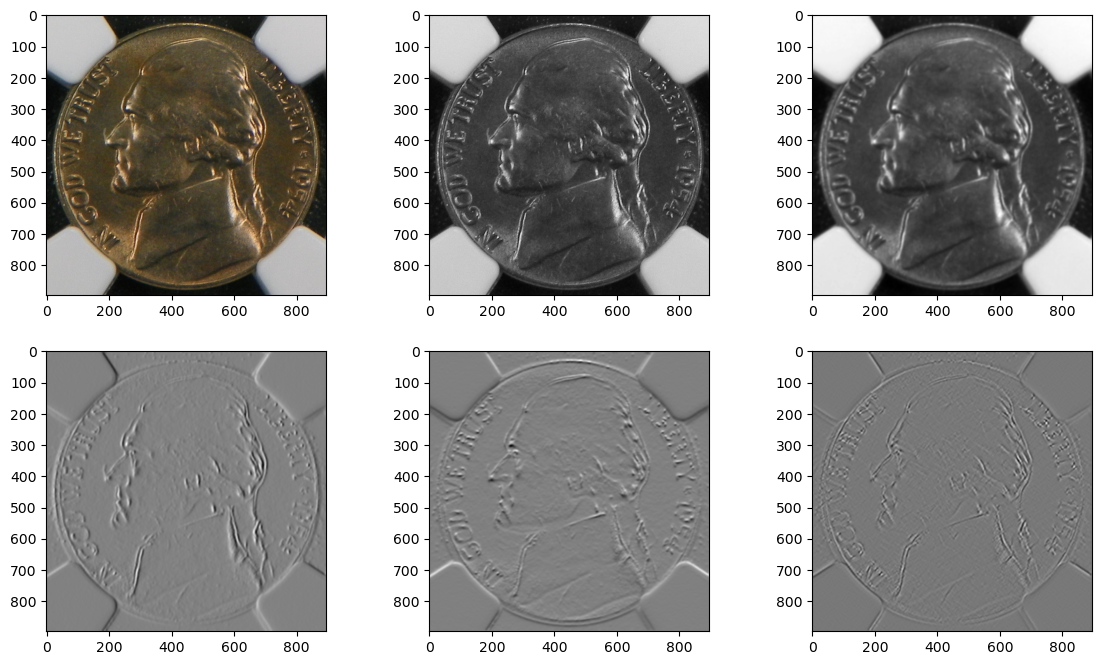

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (14, 8))
ax1.imshow(img)
ax2.imshow(gray_img, cmap = 'gray')
ax3.imshow(img_blur, cmap = 'gray')
ax4.imshow(sobel_x, cmap = 'gray')
ax5.imshow(sobel_y, cmap = 'gray')
ax6.imshow(sobel_xy, cmap = 'gray')

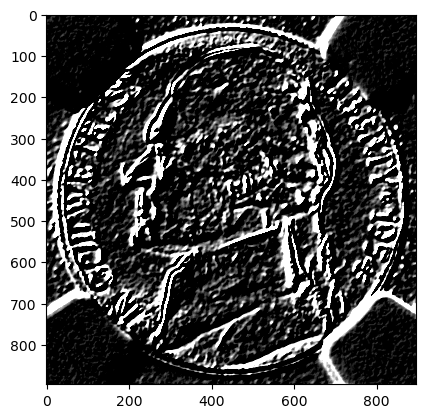

In [7]:
plt.imshow(sobel_x + sobel_y + sobel_xy, cmap = 'gray', vmin = 0, vmax = 255)

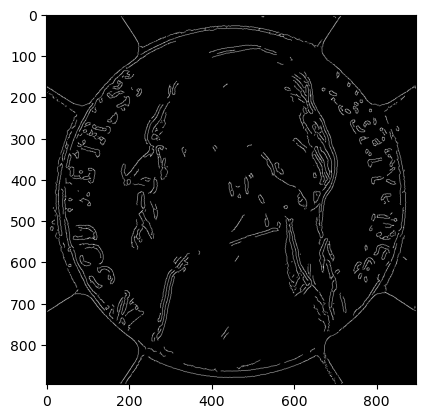

In [14]:
edges = cv2.Canny(image = img_blur, threshold1 = 50, threshold2 = 30)
plt.imshow(edges, cmap = 'gray', vmin = 0, vmax = 255)

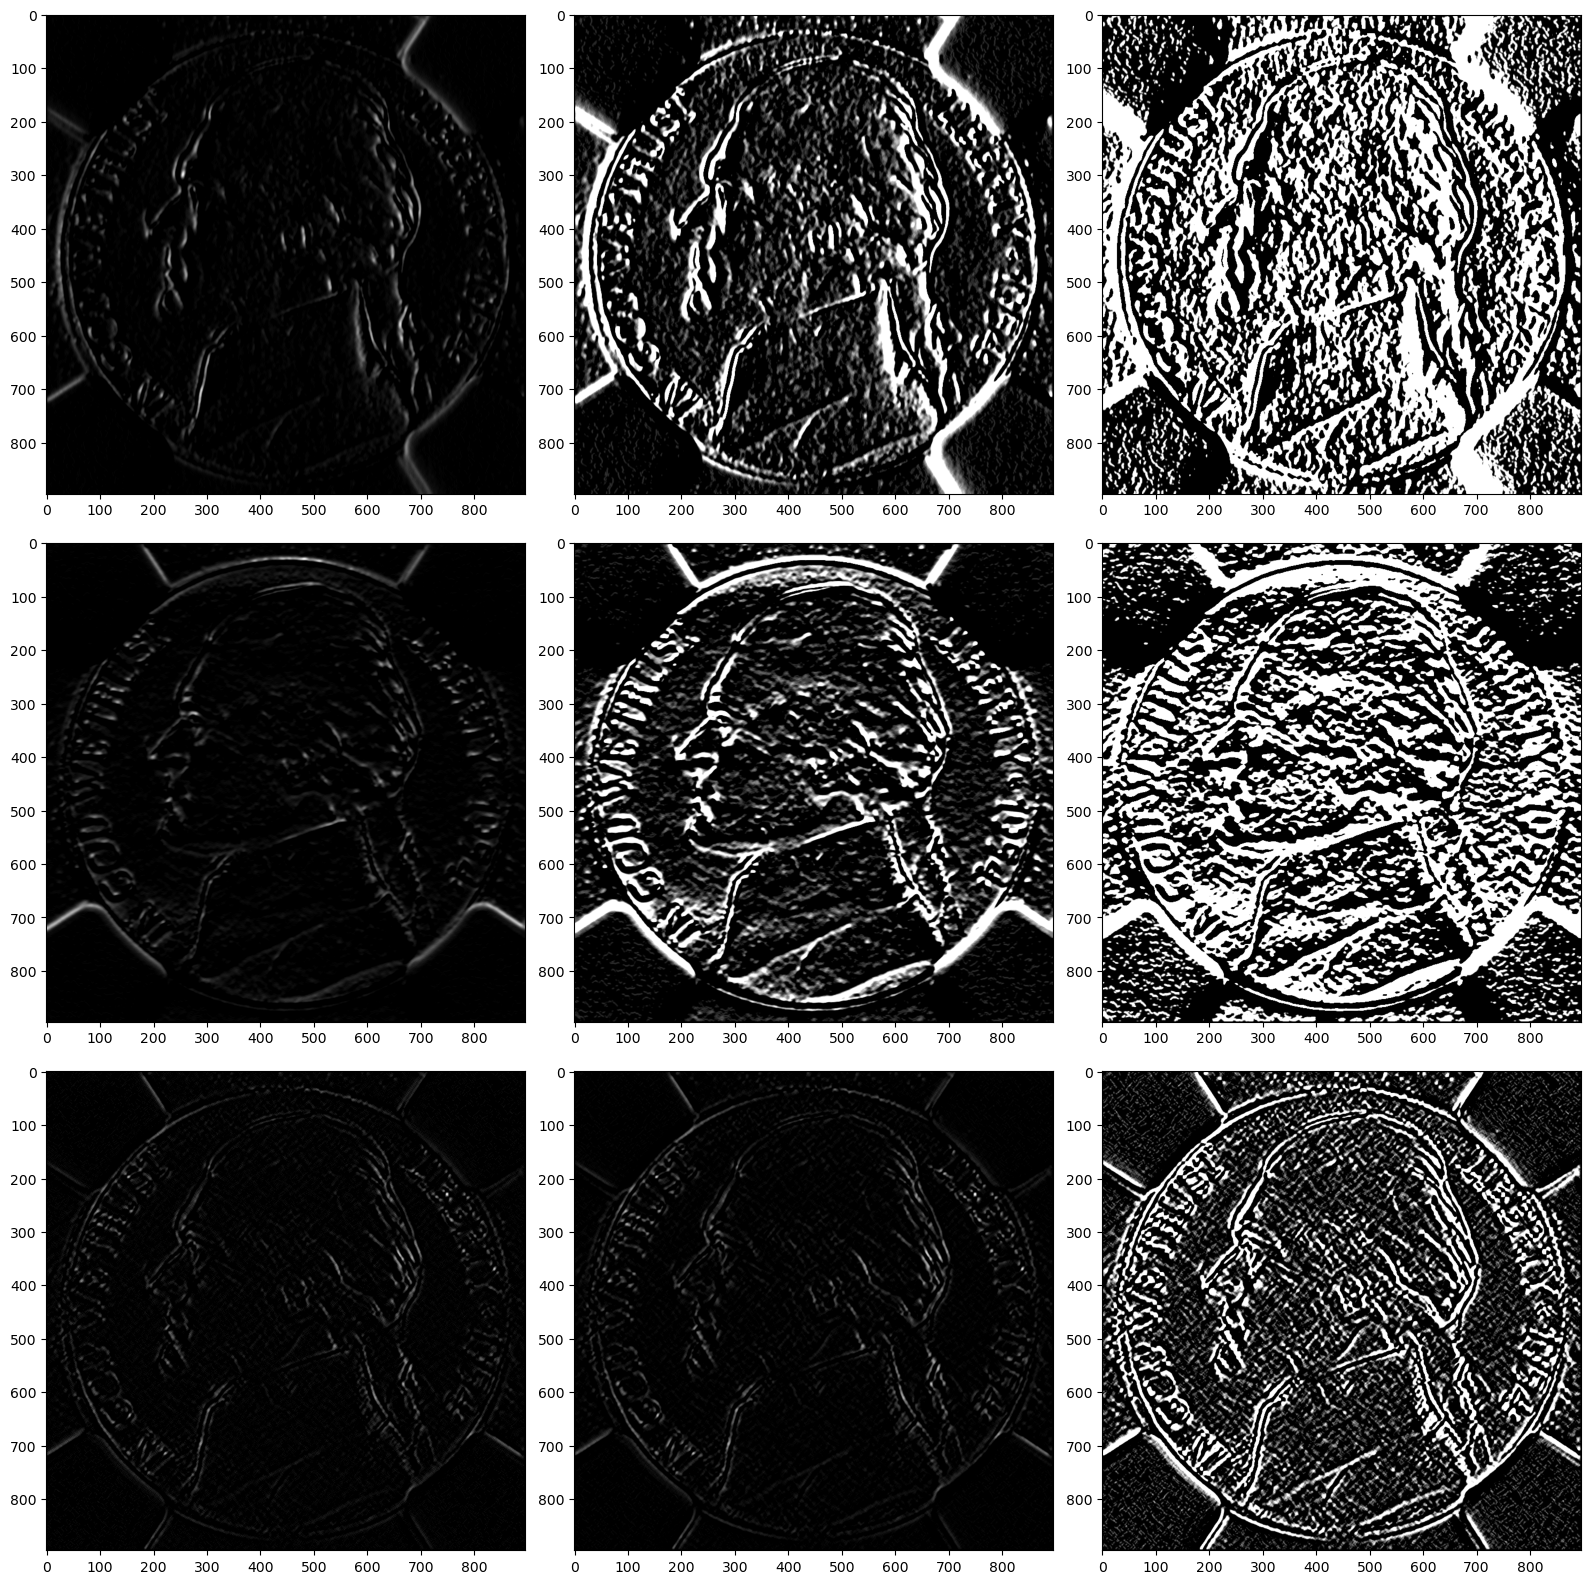

In [9]:
sobel_x_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 3)
sobel_x_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 5)
sobel_x_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 7)

sobel_y_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 3)
sobel_y_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 5)
sobel_y_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 7)

sobel_xy_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 3)
sobel_xy_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 5)
sobel_xy_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 7)

fig, axs = plt.subplots(3, 3, figsize = (16, 16))
axs[0][0].imshow(sobel_x_3, cmap = 'gray')
axs[0][1].imshow(sobel_x_5, cmap = 'gray')
axs[0][2].imshow(sobel_x_7, cmap = 'gray')

axs[1][1].imshow(sobel_y_5, cmap = 'gray')
axs[1][2].imshow(sobel_y_7, cmap = 'gray')
axs[1][0].imshow(sobel_y_3, cmap = 'gray')

axs[2][0].imshow(sobel_xy_3, cmap = 'gray')
axs[2][1].imshow(sobel_xy_5, cmap = 'gray')
axs[2][2].imshow(sobel_xy_7, cmap = 'gray')
fig.tight_layout()

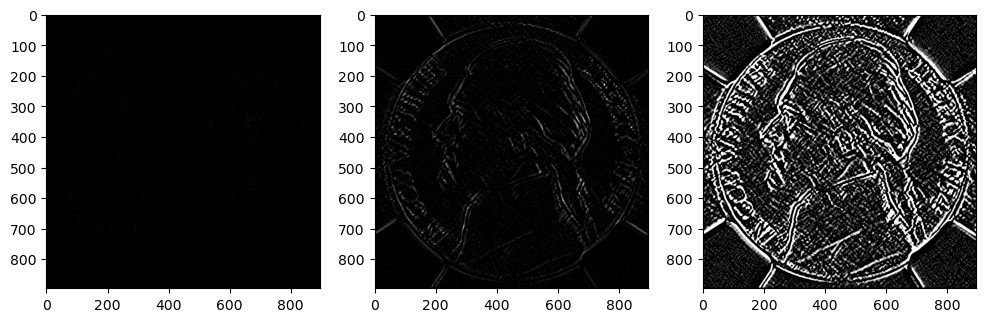

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (12, 12))
axs[0].imshow(sobel_xy_3, cmap = 'gray', vmin = 0, vmax = 255)
axs[1].imshow(sobel_xy_5, cmap = 'gray', vmin = 0, vmax = 255)
axs[2].imshow(sobel_xy_7, cmap = 'gray', vmin = 0, vmax = 255)

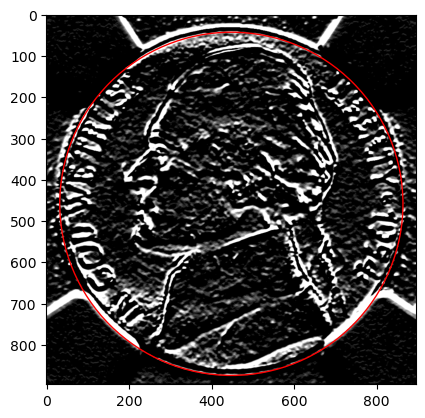

In [11]:
circles = cv2.HoughCircles(
    sobel_y_5,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(sobel_y_5, cmap = 'gray')

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
ax.add_patch(best_circle_patch)

plt.show()

In [12]:
circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)

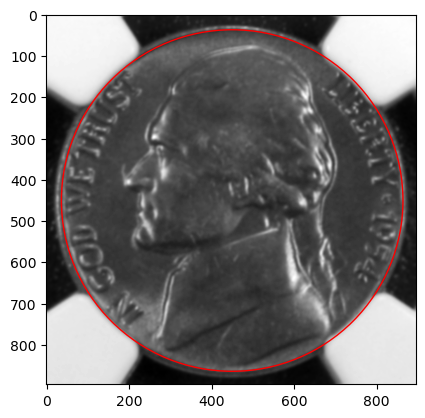

In [13]:
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(img_blur, cmap = 'gray')

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
ax.add_patch(best_circle_patch)

plt.show()